In [1]:
# Import all necessary libraries.
import pydot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import mode
from sklearn.base import clone
from IPython.display import Image 
from sklearn.datasets import make_moons
from sklearn.externals.six import StringIO
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report

C:\Users\mferrero\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Define the number of examples.
N = 10000
# Create the dataset.
x, y = make_moons(n_samples = N, noise = 0.4, random_state=42)

In [3]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

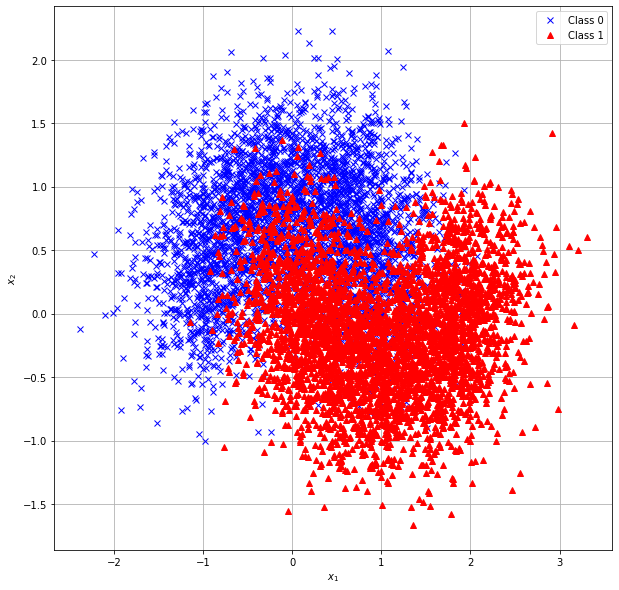

In [4]:
# Plot training data set.
idx0 = np.argwhere(y_train == 0)
idx1 = np.argwhere(y_train == 1)

fig = plt.figure(figsize=(10,10))
plt.plot(x_train[idx0,0], x_train[idx0,1], 'bx', label='Class 0')
plt.plot(x_train[idx1,0], x_train[idx1,1], 'r^', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.legend()
#plt.savefig('Distribution_of_classes_for_train_set', dpi=600)
plt.show()

## k-NN Classifier

In [5]:
# Set parameters for grid-search
param_grid = [{'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}]

# Instantiate DT Classifier
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, param_grid, cv=5, verbose=3, n_jobs=-1)

# Train model for grid_search
grid_search.fit(x_train, y_train)

print('Optimal Hyperparameters:\n', grid_search.best_params_)
print('\nBest Score: ', grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s


Optimal Hyperparameters:
 {'max_leaf_nodes': 16}

Best Score:  0.8564


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


## Decision Tree

In [6]:
# Create classifier.
dtc = DecisionTreeClassifier(max_leaf_nodes=16)

# Fit the classifier on the training features and labels.
dtc.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = dtc.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy for test data: ', accuracy)

Accuracy for test data:  0.852


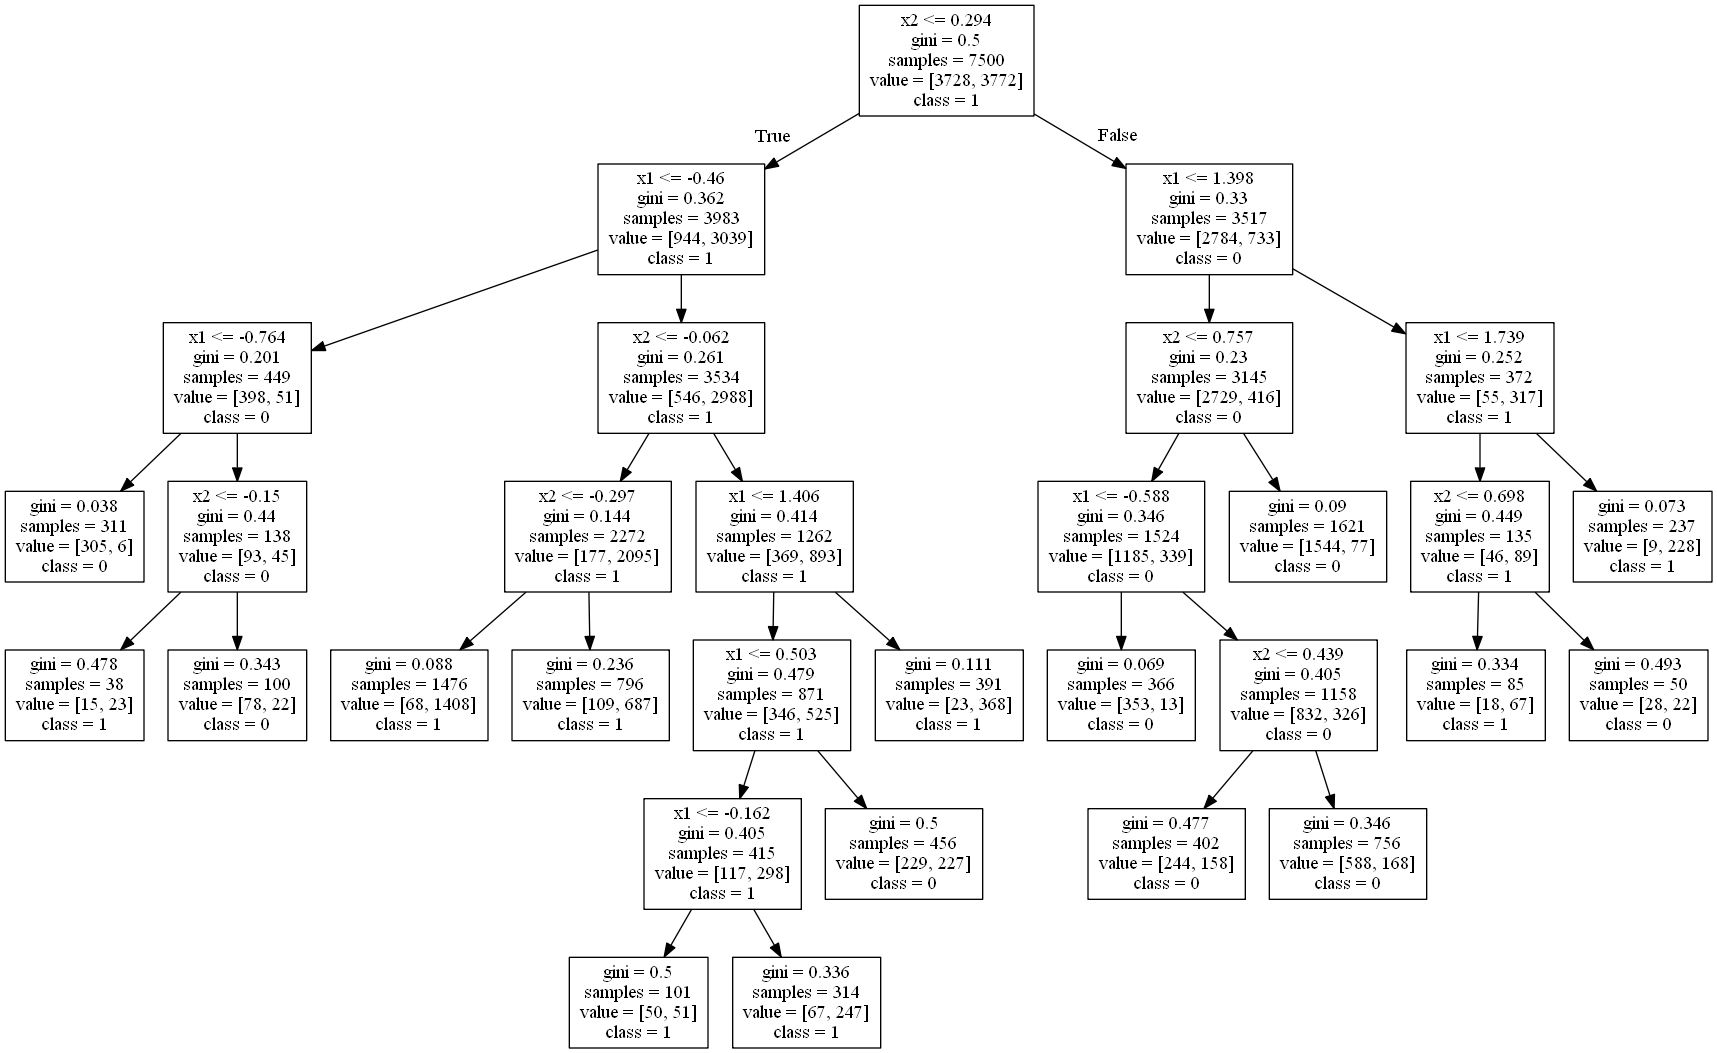

In [7]:
# Visualize the decision tree.
dot_data = StringIO()  
tree.export_graphviz(dtc, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Plot of Decision boundary

(295, 385)


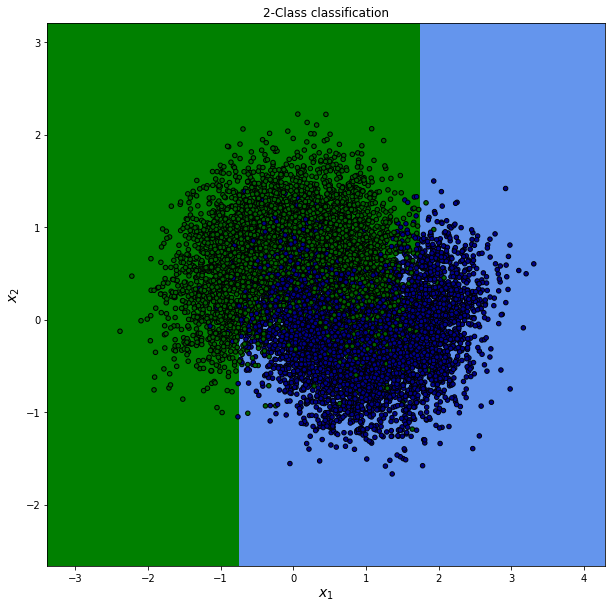

In [8]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['green', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkgreen', 'c', 'darkblue'])

plt.figure(figsize=(10, 10))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])

print(xx.shape)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

#plt.savefig('decision_boundary_dt.png', dpi=600)
plt.show()

## Confusion Matrix

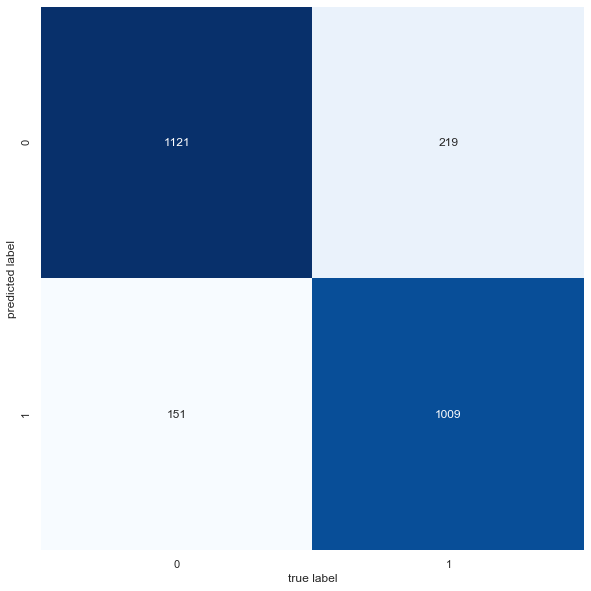

In [9]:
# Plot the confusion matrix.

fig = plt.figure(figsize=(10,10))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_lr.png', dpi=600)
plt.show()

## Plot of ROC curve

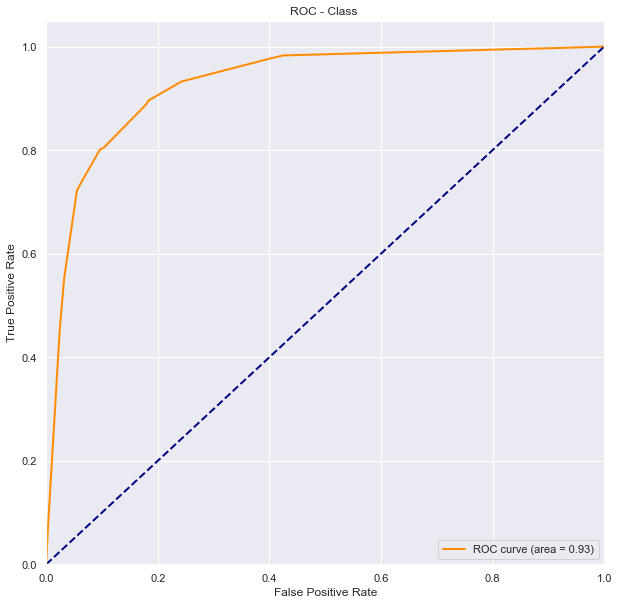

In [10]:
# Getting the probabilities for each class.
y_prob = dtc.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(10, 10))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

plt.savefig('roc_dt.png', dpi=600)
plt.show()

## Main classification metrics

In [11]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1272
           1       0.87      0.82      0.85      1228

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



## Generating 1000 subsets of the training set

In [12]:
# Generate 100 randomly examples

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(x_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(x_train):
    x_mini_train = x_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((x_mini_train, y_mini_train))

forest=[clone(grid_search.best_estimator_) for _ in range(1000)]
accuracy = []

for tree, (x_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(x_mini_train, y_mini_train)
    y_pred = tree.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))

## Accuracy of Test Set

In [13]:
print('Average Accuracy for test data:', np.mean(accuracy)*100,'%')  

Average Accuracy for test data: 80.19908 %


## Generate Prediction of Random Forests

In [14]:
# Random Forests Prediction 
forest=[clone(grid_search.best_estimator_) for _ in range(1000)]

y_pred_tree = np.empty([1000, len(x_test)], dtype=np.uint8)  

for tree_index, tree in enumerate(forest):                 
    tree.fit(x_mini_train, y_mini_train)
    y_pred_tree[tree_index]=tree.predict(x_test)
     
y_pred_freq, count = mode(y_pred_tree, axis=0)

## Accuracy of Prediction - Test Set

In [15]:
# Accuracy of predictions - Test Set
print('Accuracy for prediction test data:', accuracy_score(y_test, y_pred_freq.reshape([-1]))*100,'%')

Accuracy for prediction test data: 78.2 %
